In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
data = '../../data'

In [2]:
# load far tiff file
im_on = cv2.imread(data+'/'+'far_on.tiff', cv2.IMREAD_GRAYSCALE)
im_off = cv2.imread(data+'/'+'far_off.tiff', cv2.IMREAD_GRAYSCALE)


In [3]:
# load mid tiff file
im_on = cv2.imread(data+'/'+'mid_on.tiff', cv2.IMREAD_GRAYSCALE)
im_off = cv2.imread(data+'/'+'mid_off.tiff', cv2.IMREAD_GRAYSCALE)


In [2]:
# load near tiff file
im_on = cv2.imread(data+'/'+'near_on.tiff', cv2.IMREAD_GRAYSCALE)
im_off = cv2.imread(data+'/'+'near_off.tiff', cv2.IMREAD_GRAYSCALE)


In [3]:
data_on =   im_on.copy() #np.array(im_on)
data_off =  im_off.copy() #np.array(im_off)

data_diff = cv2.subtract(data_on, data_off)

print(f'im shape: {data_diff.shape}')



im shape: (1080, 1440)


image on props: min=0, max=255, mean=0.6780825617283951
image off props: min=0, max=20, mean=0.6392869084362139
image diff props: min=0, max=255, mean=0.10990676440329218


Text(0.5, 1.0, 'Image DIFF')

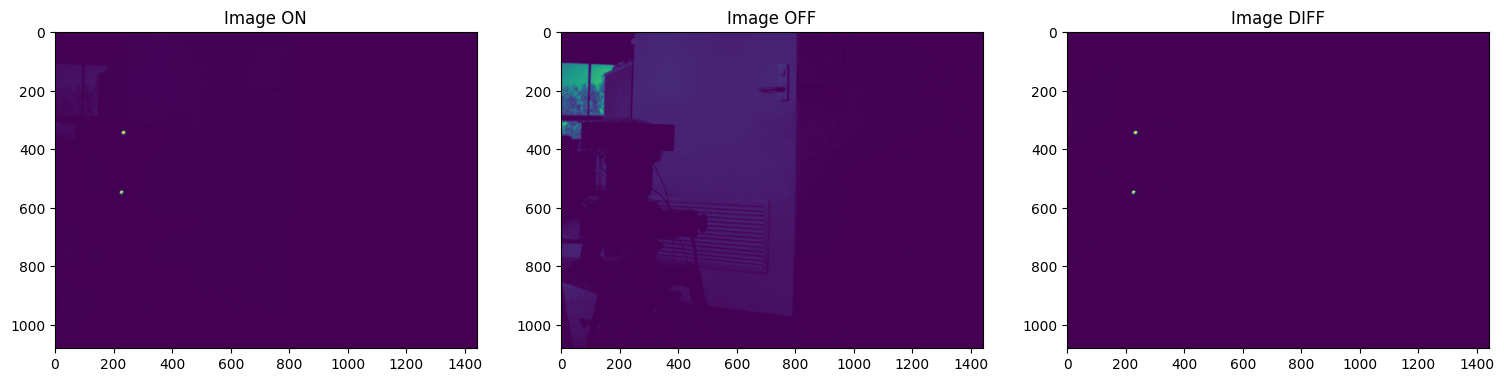

In [4]:
print(f'image on props: min={data_on.min()}, max={data_on.max()}, mean={data_on.mean()}')
print(f'image off props: min={data_off.min()}, max={data_off.max()}, mean={data_off.mean()}')
print(f'image diff props: min={data_diff.min()}, max={data_diff.max()}, mean={data_diff.mean()}')

fig, axs = plt.subplots(1,3)
# increase fig size
fig.set_size_inches(18.5, 10.5)
axs[0].imshow(data_on)
axs[1].imshow(data_off)
axs[2].imshow(data_diff)

# Set titles for each axes
axs[0].set_title('Image ON')
axs[1].set_title('Image OFF')
axs[2].set_title('Image DIFF')

[(233, 345), (226, 549)]


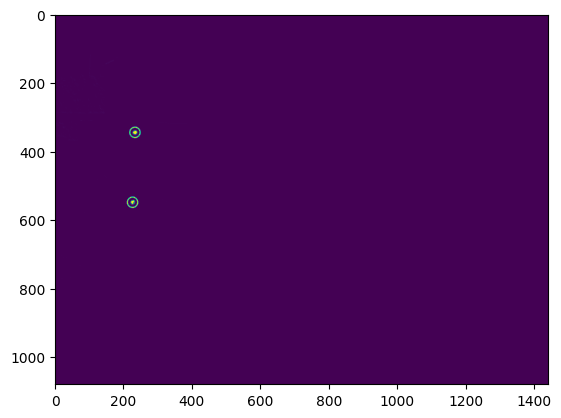

In [5]:
radius = 41
do_gauss = True

def get_n_max(data_on, data_off, n):
    arr = cv2.subtract(data_on, data_off)

    if do_gauss:
        arr = cv2.GaussianBlur(arr, (radius, radius), cv2.BORDER_DEFAULT)

    res = []
    for i in range(n):
        (*_, maxLoc) = cv2.minMaxLoc(arr)
        res.append(maxLoc)
        cv2.circle(arr, maxLoc, radius, 0, -1)
    return res

maxs = get_n_max(data_on, data_off, 2)

print(maxs)

tmp = data_diff.copy()
for m in maxs:
    cv2.circle(tmp, m, 15, 255, 2)

plt.imshow(tmp); plt.show()

[(233, 345), (226, 549)]


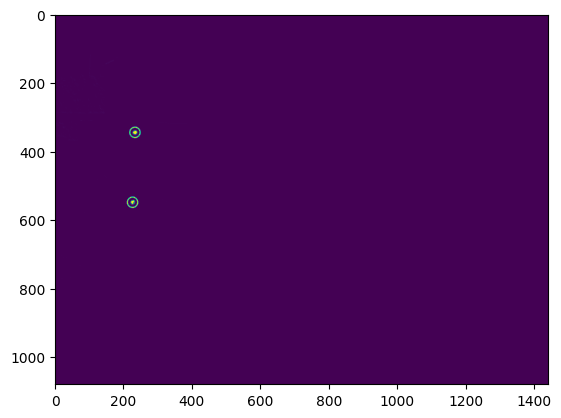

In [6]:

radius = 41
margin = 20
do_gauss = True
sub_rect = (slice(0, data_on.shape[0]), slice(0, data_on.shape[1]))

def get_n_max(data_on, data_off, n):
    nonlocal sub_rect
    sub_data_on = data_on[sub_rect]
    sub_data_off = data_off[sub_rect]
    arr = cv2.subtract(sub_data_on, sub_data_off)

    if do_gauss:
        arr = cv2.GaussianBlur(arr, (radius, radius), cv2.BORDER_DEFAULT)

    res = []
    for i in range(n):
        (*_, maxLoc) = cv2.minMaxLoc(arr)

        maxLoc = (maxLoc[0] + sub_rect[1].start, maxLoc[1] + sub_rect[0].start)

        res.append(maxLoc)
        cv2.circle(arr, maxLoc, radius, 0, -1)

    # sub_rect = (slice(
    #     maxLoc[1] - margin if maxLoc[1] > margin else 0,
    #     maxLoc[1] + margin of ), slice(maxLoc[0] - margin, maxLoc[0] + margin))

    return res

maxs = get_n_max(data_on, data_off, 2)

print(maxs)

tmp = data_diff.copy()
for m in maxs:
    cv2.circle(tmp, m, 15, 255, 2)

plt.imshow(tmp); plt.show()
